# **Universidad ICESI**

Aprendizaje Automático I

# Quiz 2 - Parte 2

**Objetivo:**  
Implementar y evaluar un modelo de regresión logística utilizando un dataset de clasificación de scikit‑learn. Deberás completar los bloques de código indicados, responder preguntas y justificar tus decisiones.

**Temas a evaluar:**

- Carga y exploración de datos  
- Normalización de características  
- Entrenamiento de un modelo de regresión logística  
- Evaluación del rendimiento (matriz de confusión, accuracy, curva ROC y AUC)  
- Interpretación de coeficientes y resultados

**Instrucciones Generales:**

1. Lee detenidamente cada sección y sigue las instrucciones proporcionadas.  
2. Completa los espacios indicados con tu código y comentarios que expliquen tus decisiones.  
3. Responde las preguntas de reflexión al final del examen en celdas Markdown adicionales.  
4. Se evaluará la calidad del código, la claridad de los comentarios y la interpretación de los resultados.
¡Buena suerte!

## Sección 1: Preparación del Entorno

**Objetivos:**  

- Importar las librerías necesarias.  
- Configurar la semilla para garantizar la reproducibilidad.

**Tareas:**

1. Importa `numpy`, `pandas`, `matplotlib.pyplot`, `seaborn` y las funciones necesarias de scikit‑learn.
2. Establece una semilla aleatoria (por ejemplo, 42).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

# Configurar la semilla para reproducibilidad

In [2]:
np.random.seed(77)

## Sección 2: Carga y Exploración del Dataset

**Objetivos:**  
- Cargar el dataset de cáncer de mama de scikit‑learn.  
- Convertir los datos en un DataFrame de pandas.  
- Explorar el dataset: dimensiones, primeras filas y distribución de la variable objetivo.

**Tareas:**  
1. Utiliza la función `load_breast_cancer()` para cargar los datos.  
2. Crea un DataFrame con las características y agrega la columna 'target'.  
3. Muestra el tamaño del dataset, las primeras filas y la distribución de las clases.


# Completa el siguiente código:

In [9]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Mostrar dimensiones y primeras filas
print(df.head())

# Distribución de la variable objetivo
print(df['target'].value_counts())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

## Sección 3: Preprocesamiento y Normalización de Datos

**Objetivos:**  

- Separar las variables predictoras (X) y la variable respuesta (y).  
- Dividir el dataset en conjunto de entrenamiento y prueba (70%-30%).  
- Normalizar las características utilizando `StandardScaler`.

**Tareas:**  

1. Define X como todas las columnas excepto 'target' y y como la columna 'target'.  
2. Usa `train_test_split` (con `stratify=y`) para preservar la distribución de clases.  
3. Ajusta el escalador con el conjunto de entrenamiento y transforma ambos conjuntos.

# Completa el siguiente código:

In [11]:
#1 Separar las variables X de la variable y
X=df.drop(columns=['target'])
y=df['target']

#2 Dividir el dataset de entrenamiento y el prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77, stratify=y)

#3 Normalizar los datos
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Sección 4: Entrenamiento del Modelo de Regresión Logística

**Objetivos:**  
- Instanciar y entrenar el modelo de regresión logística con los datos normalizados.  
- Visualizar y analizar los coeficientes obtenidos.

**Tareas:**  

1. Crea una instancia de `LogisticRegression` (sugerencia: utiliza el solver 'liblinear').  
2. Ajusta el modelo con el conjunto de entrenamiento normalizado.  
3. Imprime el intercepto y los coeficientes asociados a cada variable.
4. Agrega comentarios interpretando qué significa un coeficiente positivo o negativo en este contexto.

# Completa el siguiente código:

In [18]:
#1 Instanciar el modelo
modelo=LogisticRegression(solver='liblinear', random_state=77)

#2 Entrenar el modelo con los datos
modelo.fit(X_train, y_train)

#3 Imprimir el intercepto y los coeficientes asociados
print("Intercepto del modelo (β0):", modelo.intercept_[0])
coeficientes=pd.DataFrame({"Variable": X.columns,"Coeficiente": modelo.coef_[0]})
print("\nCoeficientes del modelo:")
print(coeficientes)


Intercepto del modelo (β0): 0.46144567949235327

Coeficientes del modelo:
                   Variable  Coeficiente
0               mean radius    -0.531225
1              mean texture    -0.358107
2            mean perimeter    -0.516540
3                 mean area    -0.519570
4           mean smoothness     0.045024
5          mean compactness     0.295305
6            mean concavity    -0.928801
7       mean concave points    -0.965095
8             mean symmetry     0.134707
9    mean fractal dimension     0.306161
10             radius error    -1.019783
11            texture error     0.306693
12          perimeter error    -0.641568
13               area error    -0.833469
14         smoothness error    -0.570469
15        compactness error     0.890181
16          concavity error     0.010270
17     concave points error    -0.210998
18           symmetry error     0.522960
19  fractal dimension error     0.760483
20             worst radius    -0.810350
21            worst text

**Los coeficientes anteriores nos muestran qué: **


*   Las variables que tienen coeficiente positivo como lo serían "compactness error, fractal dimension error, symmetry error" indican que aumenta la probabilidad de que el tumor sea benigno.
*   Lo contrario pasa con las variables que tienen coeficientes negativos, como lo serían "worst texture o worst fractal dimension" porque esos aumentan la probabilidad de que el tumor sea maligno.



## Sección 5: Evaluación del Modelo

**Objetivos:**  

- Realizar predicciones sobre el conjunto de prueba.  
- Evaluar el rendimiento del modelo mediante métricas (accuracy, matriz de confusión, reporte de clasificación).  


**Tareas:**  

1. Utiliza `predict` para obtener las predicciones en el conjunto de prueba.  
2. Calcula y muestra la matriz de confusión, el accuracy y el reporte de clasificación.  
3. Obtén las probabilidades predictivas con `predict_proba` y calcula la curva ROC y el AUC.  


# Completa el siguiente código:

In [21]:
#1 Se realizan predicciones sobre el conjunto de prueba
y_pred=modelo.predict(X_test)
y_pred_proba=modelo.predict_proba(X_test)[:, 1]

#2Evaluamos el rendimiento del modelo de varias formas:
#accuracy
accuracy=accuracy_score(y_test, y_pred)
print(f"\nAccuracy del modelo: {accuracy:.4f}")

#Matriz de confusion
matriz_confusion=confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(matriz_confusion)

#3Matriz de confusión
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)



Accuracy del modelo: 0.9883
Matriz de Confusión:
[[ 62   2]
 [  0 107]]


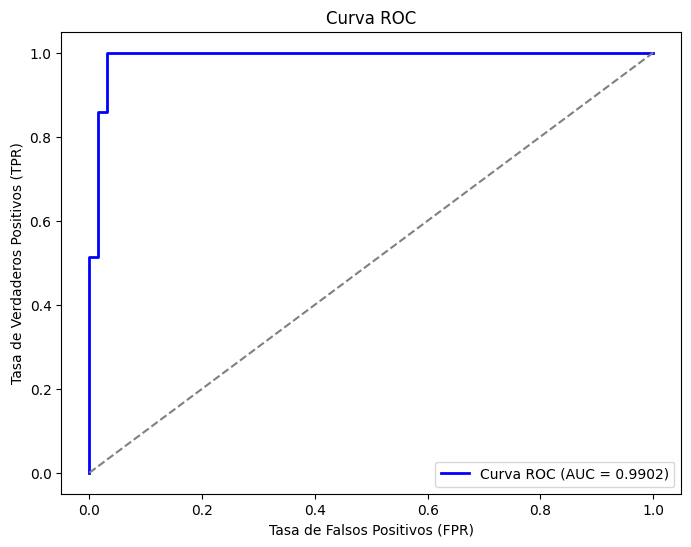


Área bajo la curva (AUC): 0.9902


In [23]:
# VISUALIZA LA Matriz de confusión
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal de referencia
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

print(f"\nÁrea bajo la curva (AUC): {roc_auc:.4f}")

## Sección 6: Reflexiones y Preguntas Abiertas

**Instrucciones:**  

Responde en celdas Markdown separadas (o en comentarios) las siguientes preguntas:
1. **Interpretación de Coeficientes:**  
   - ¿Qué implica que una variable tenga un coeficiente positivo en el contexto de la regresión logística?  
   - ¿Cómo se relaciona este coeficiente con la probabilidad de que la observación pertenezca a la clase positiva?
2. **Normalización:**  
   - Explica la importancia de normalizar las características antes de entrenar un modelo de regresión logística.
3. **Curva ROC:**  
   - ¿Qué representa la curva ROC?  
   - ¿Qué significa tener un AUC cercano a 1 en términos de rendimiento del modelo?
4. **Sobreajuste (Overfitting):**  
   - Menciona dos estrategias que pueden ayudar a prevenir el sobreajuste en modelos de clasificación.

**Consejo:** Justifica tus respuestas y relaciona los conceptos teóricos con los resultados obtenidos en este ejercicio.

# Fin!

Revisa que todas las celdas se ejecuten sin errores y asegúrate de que tus respuestas y comentarios sean claros y completos.

¡Éxito en tu evaluación!
